# **Dataset 3**

### **Import Packages**

In [1]:
import multiprocessing
import subprocess
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys

sys.path.append(os.path.abspath("../src"))

from generation.data_synthesizer import ds_generate_data
from generation.synthetic_data_vault import sdv_generate_data
from evaluation.utility import run_utility_eval
from evaluation.resemblance import pairwise_correlation_diff, jsd, wd
from evaluation.privacy import dcr, nndr, mia
from sklearn.preprocessing import LabelEncoder

### **Exploratory Data Analysis**

In [2]:
# Load the dataset as dataframe
data_path = "../data/original_data/3_edge_hill_university/3_edge_hill_university.csv"
original_data = pd.read_csv(data_path)
original_data.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,...,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)",Unnamed: 20,Unnamed: 21
0,0.0,38.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,...,13.333806,19.0,7.41,0.620767,3.0,9.0,25.000000,1.0,NaN,NaN
1,0.0,22.0,4.0,2.0,1.0,3.0,4.0,4.0,4.0,5.0,...,15.844126,1.0,0.03,0.002513,0.0,12.0,0.000000,1.0,NaN,NaN
2,0.0,21.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,...,17.706573,25.0,6.14,0.514374,5.0,7.0,41.666667,1.0,NaN,NaN
3,0.0,25.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,...,17.327498,3.0,0.16,0.013404,0.0,12.0,0.000000,1.0,NaN,NaN
4,0.0,20.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,...,0.000000,25.0,4.03,0.337610,11.0,1.0,91.666667,1.0,NaN,NaN


In [3]:
# Get general information about the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             80 non-null     float64
 1   Age                                80 non-null     float64
 2   POLAR4 Quintile                    80 non-null     float64
 3   POLAR3 Quintile                    80 non-null     float64
 4   Adult HE 2001 Quintile             80 non-null     float64
 5   Adult HE 2011 Quintile             80 non-null     float64
 6   TUNDRA MSOA Quintile               80 non-null     float64
 7   TUNDRA LSOA Quintile               80 non-null     float64
 8   Gaps GCSE Quintile                 80 non-null     float64
 9   Gaps GCSE Ethnicity Quintile       80 non-null     float64
 10  Uni Connect target ward            80 non-null     float64
 11  attending from home?               80 non-null     float64
 

In [4]:
# Check for missing values
original_data.isnull().sum()

Gender                                7
Age                                   7
POLAR4 Quintile                       7
POLAR3 Quintile                       7
Adult HE 2001 Quintile                7
Adult HE 2011 Quintile                7
TUNDRA MSOA Quintile                  7
TUNDRA LSOA Quintile                  7
Gaps GCSE Quintile                    7
Gaps GCSE Ethnicity Quintile          7
Uni Connect target ward               7
attending from home?                  7
distance to university (km)           7
Count of Module Area Logins           7
Total Hours in Module Area            7
% of Average Hours in Module Area     7
# of presence                         7
# of Absence                          9
Percent Attended                      7
label (fail=1, pass=0)                7
Unnamed: 20                          87
Unnamed: 21                          87
dtype: int64

In [5]:
original_data.tail(10)

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,...,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)",Unnamed: 20,Unnamed: 21
77,0.0,22.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,...,10.235646,32.0,5.68,0.475838,11.0,1.0,91.666667,0.0,NaN,NaN
78,1.0,21.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,...,56.938766,35.0,15.59,1.306041,8.0,4.0,66.666667,0.0,NaN,NaN
79,1.0,20.0,5.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,...,20.031985,23.0,16.30,1.365520,5.0,7.0,41.666667,0.0,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Findings: 
- 2 columns without any values
- last 7 rows without any values
- 2 additional missing values in column '# of Absence'

Thus:
- remove empty rows and columns and fill remaining missing values

In [6]:
# Drop empty columns
original_data.drop(['Unnamed: 20'], axis=1, inplace=True)
original_data.drop(['Unnamed: 21'], axis=1, inplace=True)

# Drop last 7 rows
original_data.drop(original_data.tail(7).index, inplace=True)
original_data.tail(10)

# Fill missing values with the mode of the column
original_data = original_data.fillna(original_data.mode().iloc[0])


In [7]:
# Check again for missing values
original_data.isnull().sum()

Gender                               0
Age                                  0
POLAR4 Quintile                      0
POLAR3 Quintile                      0
Adult HE 2001 Quintile               0
Adult HE 2011 Quintile               0
TUNDRA MSOA Quintile                 0
TUNDRA LSOA Quintile                 0
Gaps GCSE Quintile                   0
Gaps GCSE Ethnicity Quintile         0
Uni Connect target ward              0
attending from home?                 0
distance to university (km)          0
Count of Module Area Logins          0
Total Hours in Module Area           0
% of Average Hours in Module Area    0
# of presence                        0
# of Absence                         0
Percent Attended                     0
label (fail=1, pass=0)               0
dtype: int64

In [8]:
# Check number of unique values in each column
original_data.nunique()

Gender                                2
Age                                  12
POLAR4 Quintile                       5
POLAR3 Quintile                       5
Adult HE 2001 Quintile                5
Adult HE 2011 Quintile                6
TUNDRA MSOA Quintile                  6
TUNDRA LSOA Quintile                  6
Gaps GCSE Quintile                    6
Gaps GCSE Ethnicity Quintile          6
Uni Connect target ward               2
attending from home?                  2
distance to university (km)          46
Count of Module Area Logins          49
Total Hours in Module Area           78
% of Average Hours in Module Area    78
# of presence                        12
# of Absence                         11
Percent Attended                     14
label (fail=1, pass=0)                2
dtype: int64

In [9]:
# Check categorical columns
categorical_cols = original_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, original_data[col].unique())

### **Synthetic Data Generation**

In [10]:
# Set the start method of the multiprocessing module to 'fork' to avoid an error
multiprocessing.set_start_method('fork', force=True)

# Number of samples to generate
n = 5000

original_data_path = "../data/original_data/3_edge_hill_university/"
train_file = os.path.join(original_data_path, "train_data.csv")
test_file = os.path.join(original_data_path, "test_data.csv")

if os.path.isfile(train_file) and os.path.isfile(test_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    print("Train and test data loaded.")
else:
    # Split the data into train and test sets (70% train, 30% test) according to evaluation paper
    train_data, test_data = train_test_split(original_data, test_size=0.3, random_state=42)
    train_data.to_csv(train_file, index=False)
    test_data.to_csv(test_file, index=False)
    print("Train and test data saved.")

Train and test data loaded.


In [13]:
synth_path = "../data/synthetic_data/3_edge_hill_university/"
dataset_name = "3_edge_hill_university"
csv_files = [file for file in os.listdir(synth_path) if file.endswith(".csv")]

if len(csv_files) == 0:

    # Use train_data.csv to fit SDG models and generate synthetic data
    data_path = original_data_path + "train_data.csv"
    arguments = [data_path, str(n), dataset_name]

    print("Sampling synthpop...")
    result = subprocess.run(['Rscript', '../src/generation/synthpop.R',   *arguments], capture_output=True, text=True)

    print("Sampling DataSynthesizer...")
    ds_generate_data(data_path=data_path, num_samples=n, dataset_name=dataset_name)

    sdv_generate_data(data_path=data_path, num_samples=n, dataset_name=dataset_name)
else:
    print("Synthetic data already exists.")

Synthetic data already exists.


Encode all categorical columns of both original (train+test) data and synthetic data using label encoding

In [14]:
# Load the synthetic data as dataframe
synthpop = pd.read_csv(synth_path + "synthpop.csv")
ds = pd.read_csv(synth_path + "ds.csv")
tvae = pd.read_csv(synth_path + "tvae.csv")
gaussian_copula = pd.read_csv(synth_path + "gaussian_copula.csv")
copula_gan = pd.read_csv(synth_path + "copula_gan.csv")
ctgan = pd.read_csv(synth_path + "ctgan.csv")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

    synthpop[col] = le.fit_transform(synthpop[col])
    ds[col] = le.fit_transform(ds[col])
    tvae[col] = le.fit_transform(tvae[col])
    gaussian_copula[col] = le.fit_transform(gaussian_copula[col])
    copula_gan[col] = le.fit_transform(copula_gan[col])
    ctgan[col] = le.fit_transform(ctgan[col])

    label_encoders[col] = le

In [15]:
train_data.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
0,0.0,21.0,4.0,4.0,3.0,5.0,3.0,3.0,5.0,5.0,0.0,1.0,3.259523,81.0,70.38,2.207852,9.0,3.0,75.000000,0.0
1,0.0,20.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,0.0,1.0,17.327498,31.0,4.47,0.374471,11.0,1.0,91.666667,0.0
2,0.0,20.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,0.0,1.0,60.791145,37.0,10.29,0.862037,10.0,2.0,83.333333,0.0
3,0.0,20.0,5.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,0.0,1.0,18.488973,45.0,20.67,1.731614,10.0,2.0,83.333333,0.0
4,0.0,24.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,4.0,0.0,1.0,14.203295,38.0,13.26,1.015081,9.0,0.0,100.000000,0.0


### **Utility Evaluation**

Prepare utility evaluation

In [16]:
# Prepare datasets for utility evalutation
synth_datasets = [synthpop, ds, tvae, gaussian_copula, copula_gan, ctgan]
model_names = ["synthpop", "ds", "tvae", "gaussian_copula", "copula_gan", "ctgan"]
target_col = "label (fail=1, pass=0)"

Run random forest classifier for utility evaluation

In [28]:
rf_results = {}
rf_df = pd.read_csv("../data/results/tables/rf.csv")
rows = []

if (rf_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        rf_results[model_names[i]] = run_utility_eval(train_data, test_data, synth_dataset, target_col, "random_forest")
        acc_diff = rf_results[model_names[i]]["acc_diff"]
        f1_diff = rf_results[model_names[i]]["f1_diff"]
        roc_auc_diff = rf_results[model_names[i]]["roc_auc_diff"]
        rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])
        
    rows = pd.DataFrame(rows, columns=rf_df.columns)
    rf_df = pd.concat([rf_df, rows], ignore_index=True)
    rf_df.to_csv("../data/results/tables/rf.csv", index=False)
    rf_df.head(20)

Entry for '3_edge_hill_university' already exists


Run logistic regression for utility evaluation

In [29]:
lr_results = {}
lr_df = pd.read_csv("../data/results/tables/lr.csv")
rows = []

if (lr_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        lr_results[model_names[i]] = run_utility_eval(train_data, test_data, synth_dataset, target_col, "logistic_regression")

        acc_diff = lr_results[model_names[i]]["acc_diff"]
        f1_diff = lr_results[model_names[i]]["f1_diff"]
        roc_auc_diff = lr_results[model_names[i]]["roc_auc_diff"]

        rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])

    rows = pd.DataFrame(rows, columns=lr_df.columns)
    lr_df = pd.concat([lr_df, rows])
    lr_df.to_csv("../data/results/tables/lr.csv", index=False)
    lr_df.tail(7)

Entry for '3_edge_hill_university' already exists


Run multilayer perceptron (MLP)

In [30]:
mlp_results = {}
mlp_df = pd.read_csv("../data/results/tables/mlp.csv")
rows = []

if (mlp_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        mlp_results[model_names[i]] = run_utility_eval(train_data, test_data, synth_dataset, target_col, "multilayer_perceptron")

        acc_diff = mlp_results[model_names[i]]["acc_diff"]
        f1_diff = mlp_results[model_names[i]]["f1_diff"]
        roc_auc_diff = mlp_results[model_names[i]]["roc_auc_diff"]

        rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])

    rows = pd.DataFrame(rows, columns=mlp_df.columns)
    mlp_df = pd.concat([mlp_df, rows])
    mlp_df.to_csv("../data/results/tables/mlp.csv", index=False)
    mlp_df.tail(7)

Entry for '3_edge_hill_university' already exists


### **Resemblance**

Run multiple resemblance metrics: Difference in pairwise correlation, Jensen-Shannon divergence, Wasserstein distance

- Correlation distance diff : lower values are better
- JSD in [0,1] range: lower values are better
- WD: lower values are better


**Difference in pairwise correlation:**

In [31]:
corr_diff_df = pd.read_csv("../data/results/tables/corr_diff.csv")
rows = []

if (corr_diff_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        result = pairwise_correlation_diff(train_data, synth_dataset)
        rows.append([3,model_names[i], result])

    rows = pd.DataFrame(rows, columns=corr_diff_df.columns)
    corr_diff_df = pd.concat([corr_diff_df, rows])
    corr_diff_df.to_csv("../data/results/tables/corr_diff.csv", index=False)
    corr_diff_df.tail(7)

Entry for '3_edge_hill_university' already exists


**Jensen-Shannon Divergence**

In [32]:
jsd_df = pd.read_csv("../data/results/tables/jsd.csv")
rows = []

if (jsd_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        result = jsd(train_data, synth_dataset)
        rows.append([3,model_names[i], result])

    rows = pd.DataFrame(rows, columns=jsd_df.columns)
    jsd_df = pd.concat([jsd_df, rows])
    jsd_df.to_csv("../data/results/tables/jsd.csv", index=False)
    jsd_df.tail(7)

Entry for '3_edge_hill_university' already exists


**Wasserstein Distance**

In [33]:
wd_df = pd.read_csv("../data/results/tables/wd.csv")
rows = []

if (wd_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        result = wd(train_data, synth_dataset)
        rows.append([3,model_names[i], result])

    rows = pd.DataFrame(rows, columns=wd_df.columns)
    wd_df = pd.concat([wd_df, rows])
    wd_df.to_csv("../data/results/tables/wd.csv", index=False)
    wd_df.tail(7)

Entry for '3_edge_hill_university' already exists


### **Privacy**

Run privacy evaluation using Distance to closest Record (DCR), Nearest Neighbour Difference Ratio (NNDR) and Membership Inference Attack (MIA)

- **DCR**: a value of zero indicates that the synthetic record is an identical copy of the original
one -> leak of real information, higher values indicate more privacy

- **NNDR**: ratio is within [0,1], higher values indicate better privacy

- **MIA**: both accuracy and precision should be below 0.5 for all thresholds for strong privacy preservation

**Distance to closest record (DCR)**

In [34]:
dcr_df = pd.read_csv("../data/results/tables/dcr.csv")
rows = []

if (dcr_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        result = dcr(train_data, synth_dataset, model_names[i], dataset_name=dataset_name, save_hist=True)
        result_within_real = dcr(train_data, synth_dataset, model_names[i], dataset_name=dataset_name, within="Original", save_hist=True)
        result_within_synth = dcr(train_data, synth_dataset, model_names[i], dataset_name=dataset_name, within="Synthetic", save_hist=True)
        rows.append([3,model_names[i], result, result_within_real, result_within_synth])

    rows = pd.DataFrame(rows, columns=dcr_df.columns)
    dcr_df = pd.concat([dcr_df, rows])
    dcr_df.to_csv("../data/results/tables/dcr.csv", index=False)
    dcr_df.tail(7)
        

Entry for '3_edge_hill_university' already exists


**Nearest Neighbor distance ratio (NNDR)**

In [35]:
nndr_df = pd.read_csv("../data/results/tables/nndr.csv")
rows = []

if (nndr_df["Dataset"] == 3).any():
    print("Entry for '3_edge_hill_university' already exists")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        result = nndr(train_data, synth_dataset)
        result_within_real = nndr(train_data, synth_dataset, within="Original")
        result_within_synth = nndr(train_data, synth_dataset, within="Synthetic")
        rows.append([3,model_names[i], result, result_within_real, result_within_synth])

    rows = pd.DataFrame(rows, columns=nndr_df.columns)
    nndr_df = pd.concat([nndr_df, rows])
    nndr_df.to_csv("../data/results/tables/nndr.csv", index=False)
    nndr_df.tail(7) 

Entry for '3_edge_hill_university' already exists


**Membership Inference Attack (MIA)**

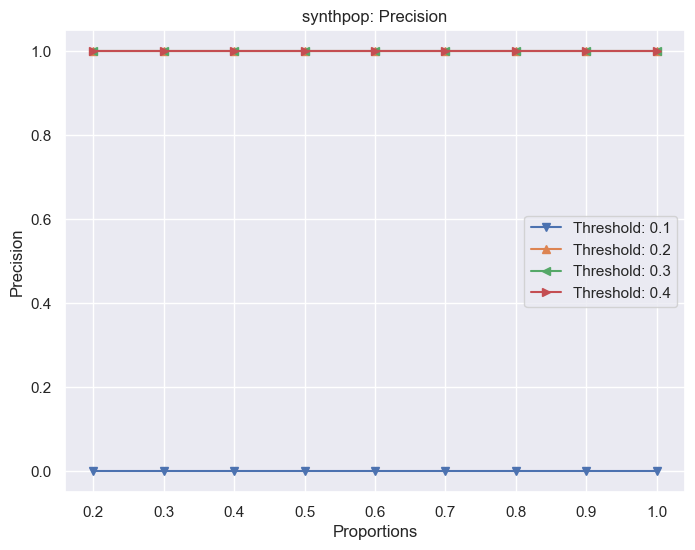

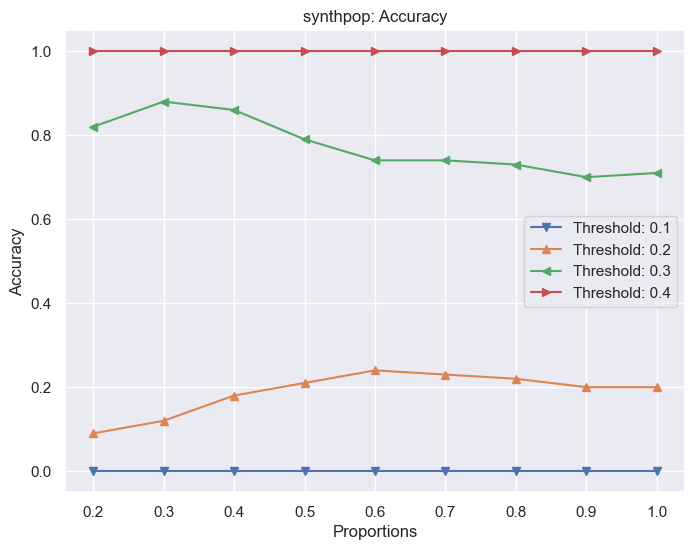

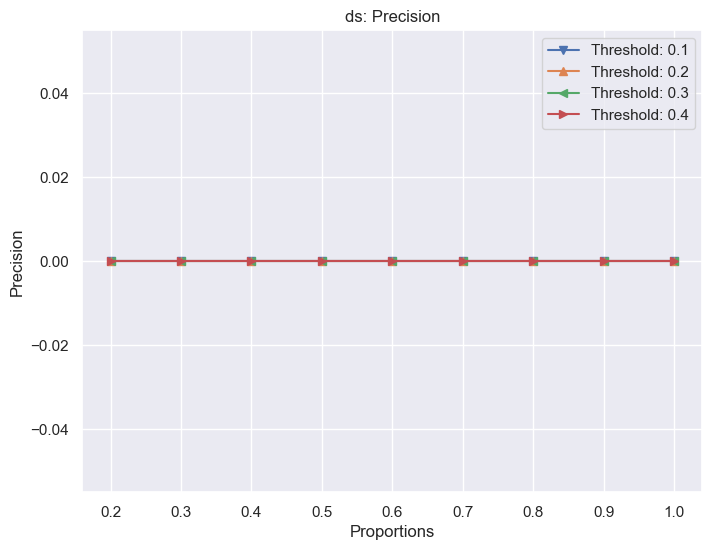

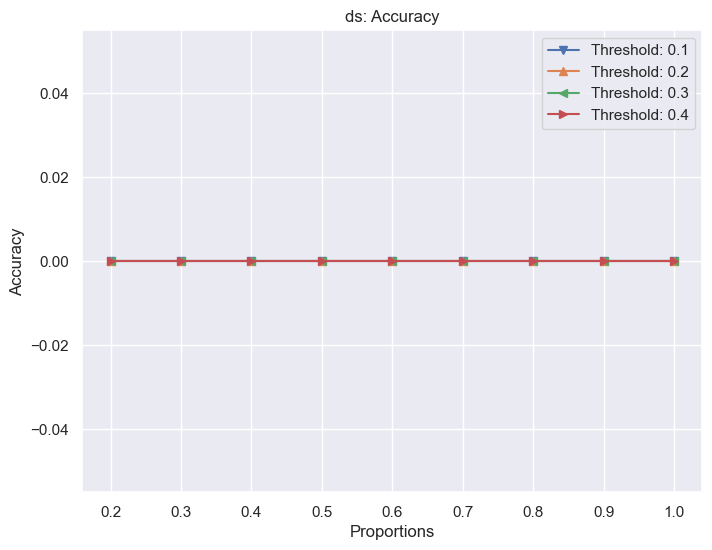

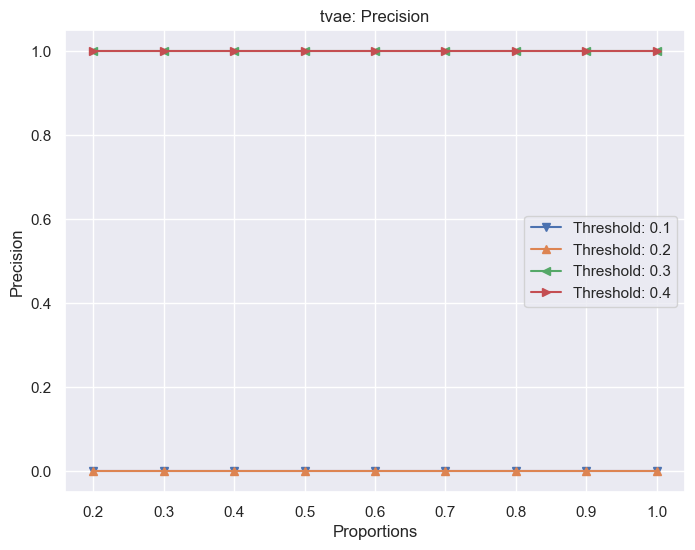

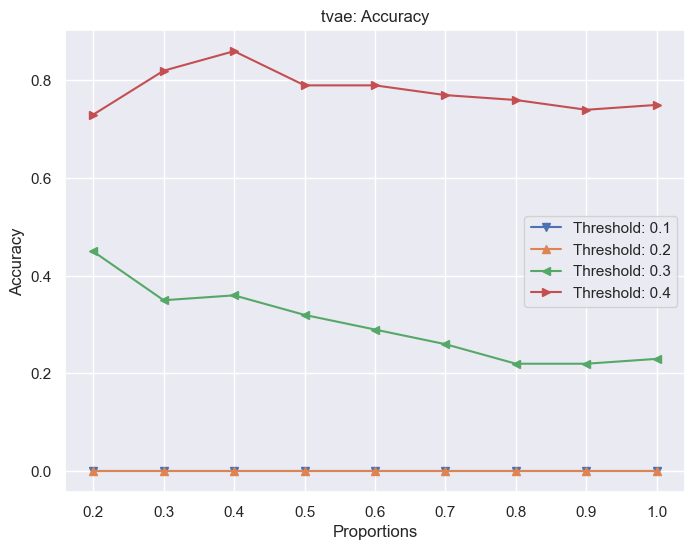

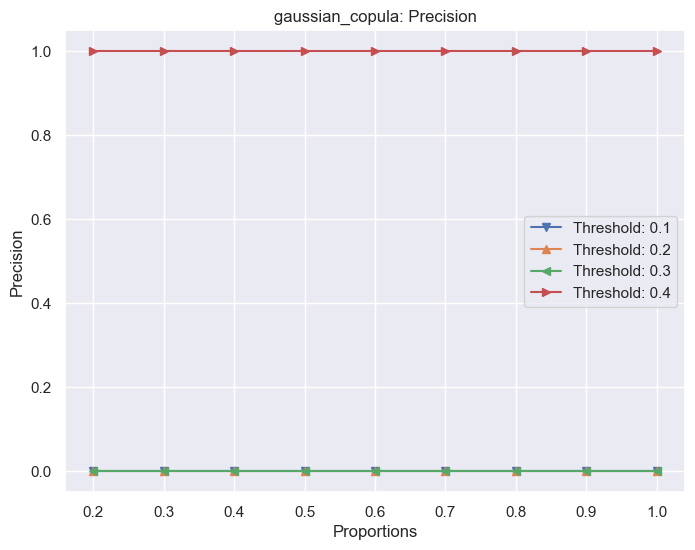

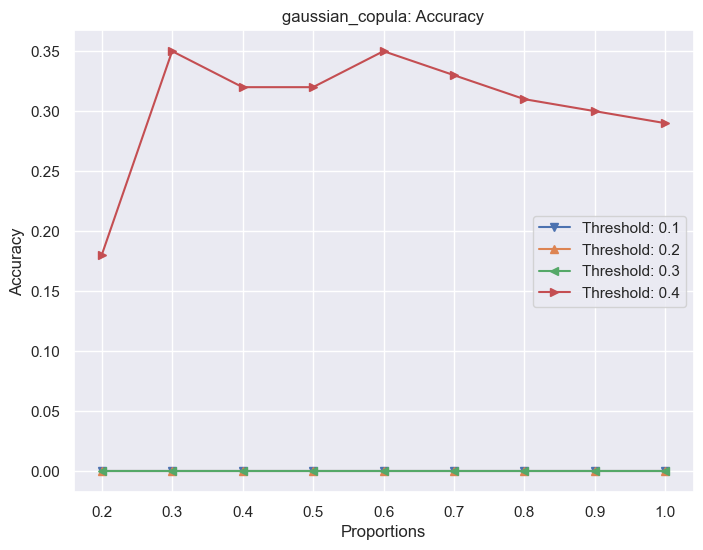

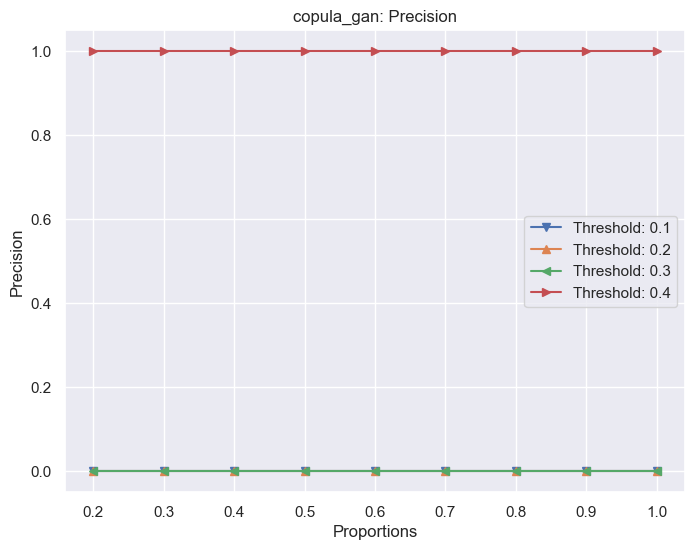

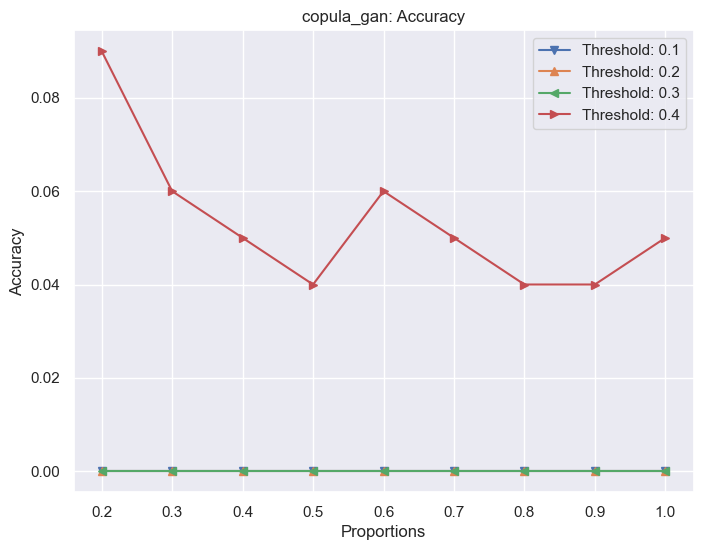

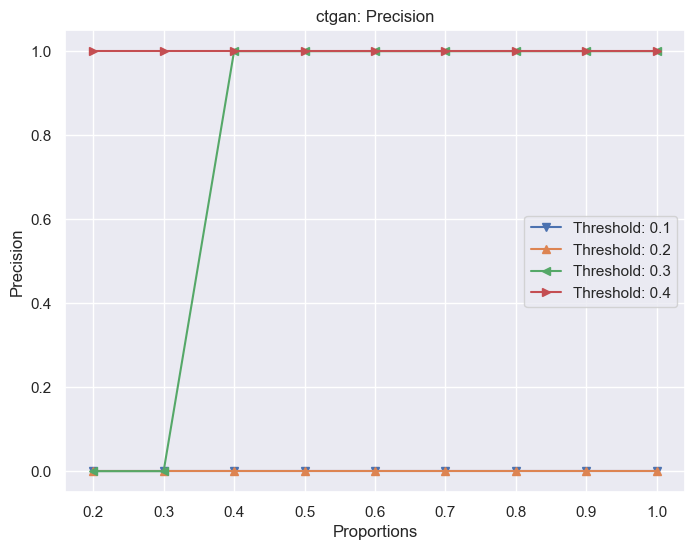

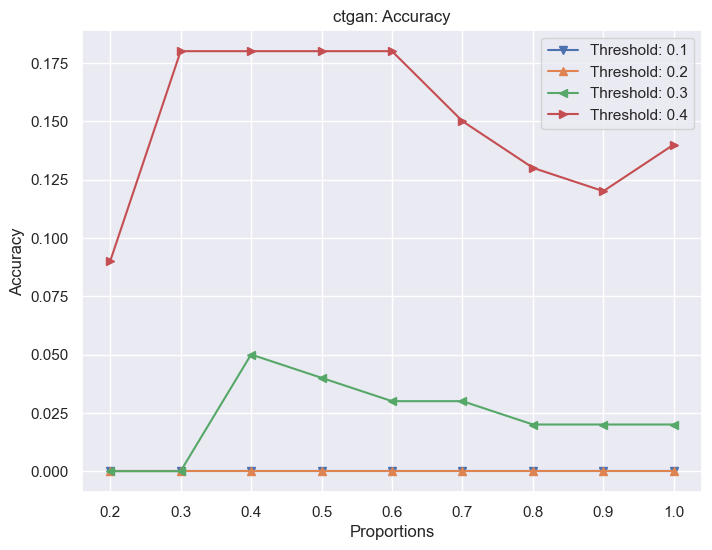

In [26]:
mia_results = {}
if (os.path.isfile("../data/results/plots/mia/3_edge_hill_university/ds_mia_accuracy.png")):
    print("MIA results already exist.")
else:
    for i, synth_dataset in enumerate(synth_datasets):
        mia_results[model_names[i]] = mia(train_data, synth_dataset, model_names[i], dataset_name=dataset_name, save_plts=True)
